In [1]:
import torch
import sys
sys.path.append('../..')

from torchuq.transform.calibrate import *
from torchuq.metric.categorical import *

torchuq.transform.basic


In [2]:
device = torch.device('cuda:0')
n_samples = 10000
n_classes = 10

In [3]:
predictions = torch.rand(n_samples, n_classes).to(device) ** 6
predictions /= predictions.sum(dim=1, keepdims=True)
labels = torch.multinomial(predictions, num_samples=1).flatten()

# Introduce some distribution shift
predictions = predictions.sqrt() 
predictions[:, 0] += 0.2
predictions[:, 3] += 0.2
predictions /= predictions.sum(dim=1, keepdims=True)

train_pred = predictions[:n_samples//2]
train_labels = labels[:n_samples//2]
test_pred = predictions[n_samples//2:]
test_labels = labels[n_samples//2:]

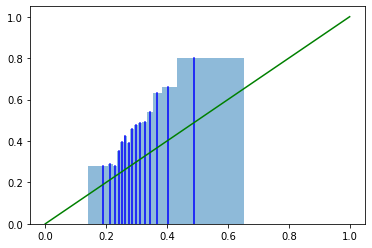

In [4]:
plot_calibration_bin(predictions, labels)

In [5]:
calibrator = DirichletCalibrator(verbose=True)
calibrator.train(predictions, labels)

_change_device is deprecated 
Finished training 0 epochs, lr=0.00100, nll = 3.244, reg = 3.688
Finished training 10 epochs, lr=0.00100, nll = 1.896, reg = 1.891
Finished training 20 epochs, lr=0.00100, nll = 1.648, reg = 1.008
Finished training 30 epochs, lr=0.00100, nll = 1.527, reg = 0.588
Finished training 40 epochs, lr=0.00100, nll = 1.450, reg = 0.378
Finished training 50 epochs, lr=0.00100, nll = 1.399, reg = 0.248
Finished training 60 epochs, lr=0.00100, nll = 1.363, reg = 0.171
Finished training 70 epochs, lr=0.00100, nll = 1.338, reg = 0.125
Finished training 80 epochs, lr=0.00100, nll = 1.321, reg = 0.099
Finished training 90 epochs, lr=0.00100, nll = 1.309, reg = 0.078
Finished training 100 epochs, lr=0.00100, nll = 1.300, reg = 0.069
Finished training 110 epochs, lr=0.00100, nll = 1.294, reg = 0.063
Finished training 120 epochs, lr=0.00100, nll = 1.290, reg = 0.063
Finished training 130 epochs, lr=0.00100, nll = 1.286, reg = 0.062
Finished training 140 epochs, lr=0.00050, n

_change_device is deprecated 


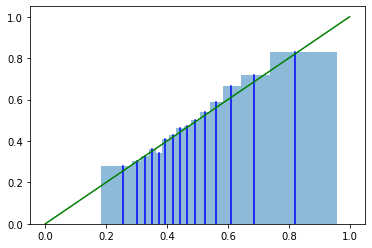

In [6]:
predictions_cal = calibrator(predictions)
plot_calibration_bin(predictions_cal, labels)